In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/gonzalo/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_label = pd.read_csv(f"../data/energy.csv")

In [3]:
df_x = pd.read_csv(f"../data/accs_x.csv")
df_y = pd.read_csv(f"../data/accs_y.csv")
df_z = pd.read_csv(f"../data/accs_z.csv")

In [4]:
df_x

,id_,time_ref,value_acc
0,0,accx_minus_0000,-0.837891
1,0,accx_minus_0001,-0.850586
2,0,accx_minus_0002,-0.835449
3,0,accx_minus_0003,-0.839844
4,0,accx_minus_0004,-0.842285
...,...,...,...
1459477,1401,accx_minus_1036,-0.009521
1459478,1401,accx_minus_1037,-0.017090
1459479,1401,accx_minus_1038,-0.018066
1459480,1401,accx_minus_1039,0.009521


## Calcular distribuciones de las aceleraciones.

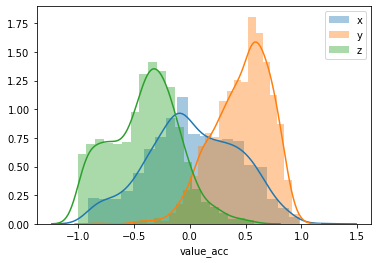

In [5]:
# Aceleración media para cada persona.
fig, ax = plt.subplots()
for df, label in zip([df_x, df_y, df_z], ["x", "y", "z"]):
    sns.distplot(df.groupby("id_").value_acc.mean(), ax=ax, label=label)
plt.legend()

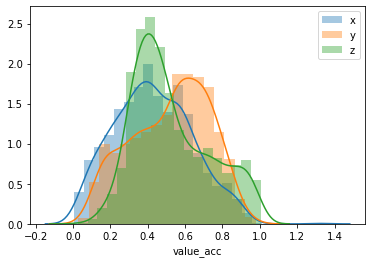

In [6]:
# Aceleración media absoluta para cada persona.
fig, ax = plt.subplots()
for df, label in zip([df_x, df_y, df_z], ["x", "y", "z"]):
    sns.distplot(df.groupby("id_").value_acc.apply(lambda x: x.abs().mean()), ax=ax, label=label)
plt.legend()

### Como de correlacionada esta la suma (absoluta) de las aceleraciones y el pulso con la energía?



In [7]:
df_label.merge(
    df_x.groupby("id_").value_acc.apply(lambda x: x.abs().std()).to_frame(),
    how="left",
    on="id_",
)[["value_energy", "value_acc", "value_Hr"]].corr()

,value_energy,value_acc,value_Hr
value_energy,1.000000,0.373528,0.202355
value_acc,0.373528,1.000000,0.112669
value_Hr,0.202355,0.112669,1.000000


La correlacion parece baja. Podemos intentar asignar cada una de las mediciones del intervalo (cada accx_minus_XXXX) con su energía.

In [8]:
pd.pivot_table(df_x, columns=["time_ref"], values="value_acc", index="id_")

time_ref,accx_minus_0000,accx_minus_0001,accx_minus_0002,accx_minus_0003,accx_minus_0004,accx_minus_0005,accx_minus_0006,accx_minus_0007,accx_minus_0008,accx_minus_0009,...,accx_minus_1031,accx_minus_1032,accx_minus_1033,accx_minus_1034,accx_minus_1035,accx_minus_1036,accx_minus_1037,accx_minus_1038,accx_minus_1039,accx_minus_1040
id_,,,,,,,,,,,,,,,,,,,,,
0,-0.837891,-0.850586,-0.835449,-0.839844,-0.842285,-0.844727,-0.839600,-0.842041,-0.840576,-0.839844,...,-0.049316,-0.051025,-0.048584,-0.048096,-0.047363,-0.044678,-0.047363,-0.047363,-0.044189,-0.040283
1,-0.071533,-0.074219,-0.072021,-0.081299,-0.076904,-0.061035,-0.085693,-0.082764,-0.074219,-0.081055,...,0.065674,-0.048096,-0.020996,-0.103271,-0.123047,-0.051270,-0.128906,-0.123291,-0.068115,-0.099854
2,-0.740479,-0.740967,-0.748291,-0.751709,-0.753174,-0.760010,-0.746582,-0.752441,-0.766602,-0.799072,...,-0.854736,-0.844482,-0.838135,-0.856445,-0.846191,-0.839844,-0.849365,-0.848633,-0.843262,-0.844971
3,-0.851074,-0.851562,-0.846924,-0.848145,-0.851074,-0.850830,-0.848877,-0.849365,-0.852539,-0.848877,...,-0.753174,-0.760010,-0.746582,-0.752441,-0.766602,-0.799072,-0.801270,-0.794922,-0.787598,-0.772705
4,0.120605,0.122559,0.129639,0.130859,0.127197,0.130127,0.129883,0.126465,0.129395,0.125488,...,-0.851074,-0.850830,-0.848877,-0.849365,-0.852539,-0.848877,-0.849854,-0.847656,-0.853760,-0.847900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,-0.868820,-0.846252,-0.842422,-0.843445,-0.837418,-0.859070,-0.844955,-0.847137,-0.852661,-0.835083,...,0.837860,0.849564,0.812775,0.815109,0.856506,0.990082,0.912140,0.847153,0.881699,0.822205
1398,-0.381195,-0.380264,-0.379333,-0.384399,-0.380112,-0.378723,-0.381714,-0.380249,-0.380585,-0.382141,...,-0.799011,-0.801865,-0.805496,-0.800201,-0.800934,-0.804962,-0.803711,-0.803635,-0.803391,-0.802048
1399,-0.819061,-0.822754,-0.814270,-0.820068,-0.822586,-0.820755,-0.815536,-0.819977,-0.819870,-0.819351,...,-0.513214,-0.513870,-0.510880,-0.508606,-0.509964,-0.510727,-0.512085,-0.510712,-0.507858,-0.508453


Cada medición de enegía tiene 1041 momentos de tiempo. Cada momento tiene 3 mediciones (x,y,z) de aceleración.

Si pusieramos todo como columnas (como arriba), tendríamos $1041\times3=3123$ columnas. Esto parece poco viable ya que el número de muestras es 1402 (habría más del doble de columnas que de muestras).

Se podría realizar reducción de dimensionalidad con PCA o LDA. Pero la lógica indica que lo que nos interesa a la hora de predecir la energía no es el valor de la aceleración en cada eje, sino el total en todos los ejes (¿módulo?) en cada momento.

Asímismo podemos ir construyendo un dataset a partir de las aceleraciones con variables como la varianza, min, max, std, etc..

In [9]:
df = pd.DataFrame()

In [10]:
module_per_ref = (df_x.value_acc ** 2 + df_y.value_acc ** 2 + df_z.value_acc ** 2) ** 0.5
module_per_ref.name = "module"
df["x_y_z_module"] = (
    pd.concat(
        [
            df_x,
            module_per_ref,
        ],
        axis=1,
    )
    .groupby("id_")
    .module.sum()
)
# Modulo de todas las mediciones (vector de 1040 componentes, una por cada accx_minus_1038)

In [11]:
# Calculate mean, var, std, min, max of all reading for every id
# put them together in df
for coord, df_coord in zip(["x", "y", "z"], [df_x, df_y, df_z]):
    df[f"{coord}_mean"], df[f"{coord}_var"], df[f"{coord}_std"], df[f"{coord}_min"], df[
        f"{coord}_max"
    ] = (
        df_coord.groupby("id_")
        .value_acc.agg(mean="mean", var="var", std="std", min="min", max="max")
        .T.values
    )

In [12]:
df

,x_y_z_module,x_mean,x_var,x_std,x_min,x_max,y_mean,y_var,y_std,y_min,y_max,z_mean,z_var,z_std,z_min,z_max
id_,,,,,,,,,,,,,,,,
0,1044.228812,-0.383048,0.162425,0.403020,-0.937012,0.163818,0.182279,0.008774,0.093669,-0.098633,0.656982,-0.757642,0.081778,0.285968,-1.201416,-0.108643
1,1063.101428,0.495318,0.195452,0.442100,-0.534912,1.526123,0.343949,0.087443,0.295708,-0.364014,2.830078,-0.491795,0.169945,0.412244,-1.316650,0.727051
2,1048.095256,-0.478014,0.200331,0.447583,-0.972412,1.207520,-0.010350,0.153995,0.392422,-1.214844,1.340576,-0.578462,0.103223,0.321284,-1.463135,0.724854
3,1044.325952,-0.330513,0.163832,0.404761,-0.969482,0.177002,0.304226,0.020605,0.143545,-0.176758,0.963623,-0.730307,0.088141,0.296885,-1.371338,-0.155273
4,1051.847994,-0.025652,0.117710,0.343089,-0.925781,1.013672,0.162303,0.030971,0.175986,-0.196533,1.337402,-0.881286,0.072464,0.269191,-1.501953,0.566162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1051.212674,0.159187,0.371290,0.609336,-1.176331,1.421555,0.639461,0.119859,0.346206,-0.870697,1.806519,-0.169585,0.076970,0.277435,-1.444489,0.724472
1398,1030.313642,-0.710687,0.030373,0.174278,-0.836884,-0.304092,0.632587,0.020038,0.141555,0.432526,1.702591,0.059045,0.021799,0.147645,-0.814743,0.415909
1399,1042.989776,-0.572104,0.018001,0.134168,-1.151840,0.108231,0.260458,0.006695,0.081825,-0.429642,0.696030,-0.740186,0.037400,0.193390,-1.141434,-0.134781


### Calcular correlaciones con la variable a predecir  value_energy

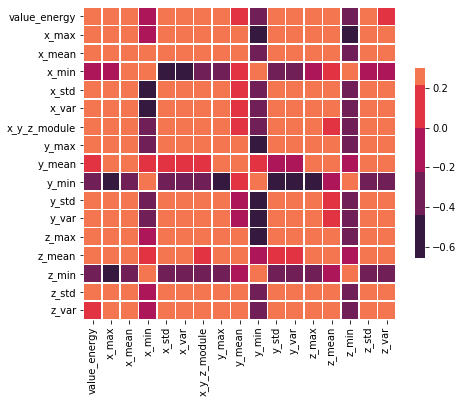

In [13]:
corr = pd.concat([df_label, df], axis=1)
corr = corr[corr.columns.difference(["value_Hr", "totalTime_energy", "id_"])].corr()
cmap = sns.color_palette("rocket")
plt.figure(figsize=(7,7))
sns.heatmap(
    corr[corr.columns.difference(["value_Hr", "totalTime_energy", "id_"])], vmax=0.3, center=0, square=True, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": 0.5}
)

## Guardar datasets

Dataset V1 no tiene el ritmo cardiaco

In [14]:
df_no_hr = pd.concat([df_label["value_energy"], df], axis=1)
df_no_hr = df_no_hr[df_no_hr.value_energy.notna()]
df_no_hr.to_csv(f"../data/dataset.csv", index=False)

Dataset V2 incluye ritmo cardiaco

In [15]:
df_hr = pd.concat([df_label[["value_energy","value_Hr"]], df], axis=1)
df_hr = df_hr[df_hr.value_energy.notna()]
df_hr.to_csv(f"../data/dataset_v2.csv", index=False)

Dataset V3 incluye gradiente

In [16]:
for coord, df_coord in zip(["x", "y", "z"], [df_x, df_y, df_z]):
    df[f"{coord}_gradient"] = (
        df_coord.groupby("id_")
        .value_acc.apply(lambda x: np.abs(np.gradient(x)).sum())
    )

In [17]:
df_grad = pd.concat([df_label["value_energy"], df], axis=1)
df_grad = df_grad[df_grad.value_energy.notna()]
df_grad.to_csv(f"../data/dataset_v3.csv", index=False)

## Calculo de METS

In [18]:
df_label["METS"] = (df_label.value_energy/75)*(df_label.totalTime_energy/3600)*3600
df_label["actividad"] = pd.cut(df_label["METS"], bins=[0, 3, 6, np.inf], right=False, labels=["ligera", "moderada", "intensa"])

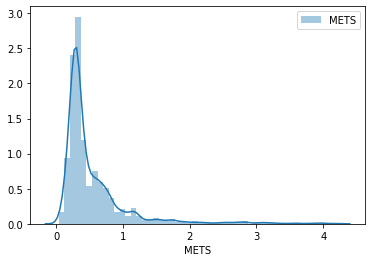

In [19]:
fig, ax = plt.subplots()
sns.distplot(df_label["METS"], ax=ax, label="METS")
plt.legend()

In [20]:
df_label.actividad.value_counts()

ligera      1386
moderada      15
intensa        0
Name: actividad, dtype: int64